In [1]:
#Putting all the functions together: 
import copy 
from time import perf_counter

In [2]:
def setup_nurikabe(clues,n):

   #Takes Nurikabe as a 1D list of clues. Returns it in 2D list in nxn form. 
    
    
    puzzle = [[-1 for j in range(n)] for j in range(n)]  # sets up puzzle so undetermined cells are represented as -1
    
    for i in range(len(clues)):
        row = i // n
        col = i % n
        if clues[i] != 0:  
            puzzle[row][col] = clues[i]
    
    return puzzle

In [3]:
setup_nurikabe([0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,5,0,0,0],6)

[[-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, 5],
 [-1, 2, -1, -1, 3, -1],
 [-1, -1, -1, -1, -1, -1],
 [2, -1, -1, -1, -1, -1],
 [-1, -1, 5, -1, -1, -1]]

In [4]:
def island_of_one(puzzle,n): 
    #islands of one are simply a simple clue of 1 given in the grid means adjacent cells should be water and marked as 0. 
    
    for row in range(1,len(puzzle)-1,1): 
        for col in range(1,len(puzzle)-1,1): 
            if puzzle[row][col] == 1:  # this section deals with islands of one that are not on edges of the grid and confirms the 4 adjacent cells as water by making them 0. 
                puzzle[row][col-1] = 0 
                puzzle[row][col+1] = 0 
                puzzle[row-1][col] = 0 
                puzzle[row+1][col] = 0 
                #works up to this point 
                #now to confirm the edge islands of one 
                
                #first confirming islands of one on the top row and bottom row. (excluding if the island of one is in corners.)
    for i in range(1,n-1): 
        if puzzle[0][i] == 1: 
            puzzle[0][i-1] = 0 
            puzzle[0][i+1] = 0 
            puzzle[1][i] = 0  
        # bottom row now excluding corners
        if puzzle[n-1][i] == 1: 
            puzzle[n-1][i-1] = 0 
            puzzle[n-1][i+1] = 0 
            puzzle[n-2][i] = 0 
         
        # now to do the same with first column 
        if puzzle[i][0] == 1: 
            puzzle[i-1][0] = 0 
            puzzle[i+1][0] = 0 
            puzzle[i][1] = 0 
        # and last column 
        
        if puzzle[i][n-1] == 1: 
            puzzle[i-1][n-1] = 0 
            puzzle[i+1][n-1] = 0 
            puzzle[i][n-2] = 0 
            
    # now to do the same for the 4 corner cells if they are an island of one 
    if puzzle[0][0]==1: #top left
        puzzle[0][1]=0 
        puzzle[1][0]=0 
        
    if puzzle[0][n-1]== 1: #top right
        puzzle[0][n-2]=0 
        puzzle[1][n-1]=0 
    
    if puzzle[n-1][0]==1: #bottom left
        puzzle[n-2][0]=0 
        puzzle[n-1][1]=0 
        
    if puzzle[n-1][n-1]==1: #bottom right
        puzzle[n-2][n-1]=0 
        puzzle[n-1][n-2]=0 
    
    return puzzle
                

In [5]:
def clues_separated_by_one(puzzle,n):
    

    for row in range(n):
        for col in range(1, n-1):  
            if puzzle[row][col] == -1:  # Check if the cell is undetermined and see if it seperates clues horizontally.
                if puzzle[row][col-1] > 0 and puzzle[row][col+1] > 0:
                    puzzle[row][col] = 0

    # Vertical check
    for col in range(n):
        for row in range(1, n-1):  
            if puzzle[row][col] == -1:  
                if puzzle[row-1][col] > 0 and puzzle[row+1][col] > 0:
                    puzzle[row][col] = 0
    
    return puzzle

In [6]:
def diagonal_clues(puzzle,n): 
    #if 2 clues are diagonally adjacent then the cells which touch both clues must be water 
    # this function will check diagonals from top left down to bottom right and start with these diagonalls leading from the cells in the first row. 
    #it will then continue and do this checking diagonalls from top left to bottom right starting with cells in the first column, except the first cell which was alsready checked. 
    #after it will check diagonals from top right to bottom left in the same way.  
    
    #checking the diagonals starting in first row, from top left to bottom right iterating. 
    for starting_cell in range(n-1): 
        for i in range(0,n-starting_cell-1): 
            if puzzle[i][starting_cell+i] > 0 and puzzle[i+1][starting_cell+i+1] > 0 : 
                puzzle[i][starting_cell+i+1]=0 #makes cell to the right of the first checked clue water
                puzzle[i+1][starting_cell+i]=0 #makes the cell below water
    
    #checking the diagonals starting in the first column from left to right downwards. the logic is the same. 
    for starting_cell in range(1, n-1):  # Start from 1 so dont repeat the first diagonal
        for i in range(n - starting_cell - 1):
            if puzzle[starting_cell + i][i] > 0 and puzzle[starting_cell + i + 1][i + 1] > 0:
                puzzle[starting_cell + i + 1][i] = 0
                puzzle[starting_cell + i][i + 1] = 0
                
    #checking the diagonals from down from right to left starting from row one second column
    for starting_cell in range(1, n):  # iterated over columns from the second to the last
        for i in range(starting_cell):
            if puzzle[i][starting_cell - i] > 0 and puzzle[i + 1][starting_cell - i - 1] > 0:
                puzzle[i + 1][starting_cell - i] = 0
                puzzle[i][starting_cell - i - 1] = 0 
                
    #diagonals from right most column down and left diagonally iterating
    for starting_cell in range(1,n-1): 
        for i in range(n - starting_cell -1): 
            if puzzle[starting_cell +i][n-i-1] > 0 and puzzle[starting_cell+i +1][n-i-2] > 0 : 
                    puzzle[starting_cell +i][n-i-2]= 0 
                    puzzle[starting_cell +i+1][n-i-1]= 0 
                    
                
    return puzzle
                

In [7]:
def surrounded_square(puzzle,n): 
    for row in range(1,len(puzzle)-1,1): # checks if squares not on the edges of the grid are surrounded by water and if so confirms this squ as water
        for col in range(1,len(puzzle)-1,1): 
            if puzzle[row][col] == -1 and puzzle[row][col-1]== 0 and puzzle[row][col+1]== 0 and puzzle[row-1][col]== 0 and puzzle[row+1][col]== 0: 
                puzzle[row][col]= 0 
    
    #now checking the edges excluding corners 
    #top row
    for i in range(1,n-1): 
        if puzzle[0][i] == -1 and puzzle[0][i-1] == 0 and puzzle[0][i+1] == 0 and puzzle[1][i] == 0: 
                puzzle[0][i]=0 
             
             
              
        # bottom row now excluding corners
        if puzzle[n-1][i] == -1 and puzzle[n-1][i-1] == 0 and puzzle[n-1][i+1]== 0 and puzzle[n-2][i]== 0:  
            puzzle[n-1][i]=0
            
              
        # now to do the same with first column 
        if puzzle[i][0] == -1 and puzzle[i-1][0] == 0 and puzzle[i+1][0] == 0 and puzzle[i][1] == 0: 
             puzzle[i][0]= 0
             
             
             
        # and last column 
        
        if puzzle[i][n-1] == -1 and puzzle[i-1][n-1] == 0 and puzzle[i+1][n-1] == 0 and puzzle[i][n-2] == 0:  
            puzzle[i][n-1] = 0 
             
             
    
    # now to do the same for the 4 corner cells if they are surrounded by water 
    if puzzle[0][0]== -1 and puzzle[0][1]==0 and puzzle[1][0]==0: #top left 
        puzzle[0][0]= 0 
         
         
        
    if puzzle[0][n-1]== -1 and puzzle[0][n-2]==0 and puzzle[0][n-2]==0 and puzzle[1][n-1]==0: #top right 
        puzzle[0][n-1]=0
         
         
    
    if puzzle[n-1][0]== -1 and puzzle[n-2][0]==0 and puzzle[n-1][1]==0: #bottom left  
        puzzle[n-1][0]= 0
        
         
         
        
    if puzzle[n-1][n-1]== -1 and puzzle[n-2][n-1]==0 and puzzle[n-1][n-2]==0: #bottom right
         puzzle[n-1][n-1]= 0
         
    
    return puzzle

In [8]:
def expand_water(puzzle, n): 
    
    updated_puzzle = [row[:] for row in puzzle]

    for row in range(n):
        for col in range(n):
            if puzzle[row][col] == 0:
                blocked_sides = 0
                expand_to = None  
                
                if row > 0: #makes sure to not check above if we are in the top row as that would be out of index
                    if puzzle[row - 1][col] > 0:
                        blocked_sides += 1
                    elif puzzle[row - 1][col] == -1:
                        expand_to = (row - 1, col)
                else: # if we are in the top row row =  0 then increment blocked sides by 1 as this is essentially blocked
                    blocked_sides += 1

                # same applies for checking below you must ensure not in the bottom row 
                if row < n - 1: 
                    if puzzle[row + 1][col] > 0:
                        blocked_sides += 1
                    elif puzzle[row + 1][col] == -1:
                        expand_to = (row + 1, col)
                else:
                    blocked_sides += 1

                # check left 
                if col > 0:
                    if puzzle[row][col - 1] > 0:
                        blocked_sides += 1
                    elif puzzle[row][col - 1] == -1:
                        expand_to = (row, col - 1)
                else:
                    blocked_sides += 1

                # finally check right
                if col < n - 1:
                    if puzzle[row][col + 1] > 0:
                        blocked_sides += 1
                    elif puzzle[row][col + 1] == -1:
                        expand_to = (row, col + 1)
                else:
                    blocked_sides += 1

                # Expand water if three sides are blocked
                if blocked_sides == 3 and expand_to is not None:
                    updated_puzzle[expand_to[0]][expand_to[1]] = 0

    return updated_puzzle

In [9]:
#Now logical filling of cells is at and end and the beginnng of the backtracker 

In [10]:
def find_adjacent_undetermined(puzzle, n): #this is to determine cells in a more intuative way.
    # First pass: look for undetermined cells adjacent to islands
    for i in range(n):
        for j in range(n):
            if puzzle[i][j] == -1:
                # Check if adjacent to an island cell
                adjacent_to_island = False
                directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # Right, Down, Up, Left
                for di, dj in directions:
                    ni, nj = i + di, j + dj  # New indices
                    if 0 <= ni < n and 0 <= nj < n and isinstance(puzzle[ni][nj], tuple):
                        adjacent_to_island = True
                        break
                if adjacent_to_island:
                    return (i, j)
    
    # Second pass: look for any undetermined cell if no adjacent ones found
    for i in range(n):
        for j in range(n):
            if puzzle[i][j] == -1:
                return (i, j)
    
    return None

# Use this modified function in your backtracker

In [11]:
# new initialisation function to get ready for backtracking:  
# This initialisation was later realised that it is essential in order to implement a backtracker as i needed some way to identify if islands with the same clue do not merge together by accident. 
# a rule of nurikabe is that different islands cannot be touching, with my initial set up two islands with clues of the same number could be touching without recognition as the same number wouldnt flag up seperate islands next to one another. 
def assign_unique_ids(puzzle, n):
    unique_id_counter = 1  # Start with 1 for the first unique ID
    
    for i in range(n):
        for j in range(n):
            if isinstance(puzzle[i][j], int) and puzzle[i][j] > 1:  #theres an island clue present 
                # the islands pf 1 dont need to have ID as they are surrounded by water in logical stages 
                # assign a unique number ID alongside the clue number 
                puzzle[i][j] = (puzzle[i][j], unique_id_counter)
                unique_id_counter += 1  # Prepare the next unique ID for the next island clue
                
    return puzzle



In [12]:
def are_islands_adjacent(puzzle, n):
    
    #Checks if any two different islands (identified by unique IDs) are improperly adjacent to each other.
    
    
    for i in range(n):
        for j in range(n):
            current_cell = puzzle[i][j]
            # Only interested in island cells (ignore water and undetermined cells)
            if isinstance(current_cell, tuple):
                current_id = current_cell[1]  # get the unique ID
                # check adjacent cells right and down to avoid double checks 
                 
                 
                
                if j < n - 1: # only check adjacent cell on the right if it is within bounds 
                    right_cell = puzzle[i][j+1] 
                    #print(right_cell)
                    if isinstance(right_cell, tuple) and right_cell[1] != current_id: #comparing the cell to the rights ID to current
                        return False 
                
                if i < n - 1: #only check down if cell below is within bounds 
                    down_cell = puzzle[i+1][j] 
                    #print(down_cell)
                    if isinstance(down_cell, tuple) and down_cell[1] != current_id: 
                        return False    
                ''''    
                if j == n-1: # if in final col then check down only
                    if isinstance(down_cell, tuple) and down_cell[1] != current_id: 
                        return False '''
                    
                
                    
                    
    
    return True  # No adjacent islands found

In [13]:
def check_islands_overfilled(puzzle, n): # the next 3 functions work together to validate if islands are overfull or disconnected. 
    island_counts = {}  # Maps unique_id to count of cells
    island_sizes = {}  # Maps unique_id to the island's clue number (expected size)

    for i in range(n):
        for j in range(n):
            cell = puzzle[i][j]
            if isinstance(cell, tuple):  # If the cell is part of an island
                clue_number, unique_id = cell
                island_counts[unique_id] = island_counts.get(unique_id, 0) + 1
                island_sizes[unique_id] = clue_number # assigns the value of clue_number to the key unique_id within the island_sizes dictionary.

    # Check if any island's cell count exceeds its clue number
    for unique_id, count in island_counts.items():
        if count > island_sizes[unique_id]:
            return False  # Island is overfilled

    return True  # No islands are overfilled

In [29]:
def dfs(puzzle, n, i, j, visited, unique_id):
    if i < 0 or i >= n or j < 0 or j >= n:  # Out of bounds
        return
    if visited[i][j] or not isinstance(puzzle[i][j], tuple):  # Already visited or not part of an island
        return
    if puzzle[i][j][1] != unique_id:  # Different island
        return
    
    visited[i][j] = True  # Mark as visited
    directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # Right, Down, Up, Left
    for di, dj in directions:
        dfs(puzzle, n, i + di, j + dj, visited, unique_id)

def are_islands_connected(puzzle, n):
    visited = [[False for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            cell = puzzle[i][j]
            if isinstance(cell, tuple) and not visited[i][j]:  # If it's an unvisited island cell
                unique_id = cell[1]
                dfs(puzzle, n, i, j, visited, unique_id)
                # After DFS, check if there are any unvisited cells with the same unique_id
                for x in range(n):
                    for y in range(n):
                        if isinstance(puzzle[x][y], tuple) and puzzle[x][y][1] == unique_id and not visited[x][y]:
                            return False  # Found an unvisited cell of the same island, so it's not fully connected
    return True



In [14]:
def dfs_water(puzzle, n, i, j, visited):
    #DFS to explore water connectivity 
    
    # Base conditions: Check if the current cell is out of bounds or already visited
    if i < 0 or i >= n or j < 0 or j >= n or visited[i][j]:
        return
    
    # Mark the current cell as visited
    visited[i][j] = True
    
    # Continue only if the current cell is water
    if puzzle[i][j] == 0 or puzzle[i][j] == -1:
        # Explore adjacent cells: up, down, left, right
        directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
        for di, dj in directions:
            dfs_water(puzzle, n, i + di, j + dj, visited)

def is_water_connected(puzzle, n):
    
    #Checks if all water cells in the puzzle are connected.
    
  
    
    
    visited = [[False for _ in range(n)] for _ in range(n)]
    
    # Find the first water cell to start the DFS
    found_water = False
    for i in range(n):
        for j in range(n):
            if puzzle[i][j] == 0:
                dfs_water(puzzle, n, i, j, visited)
                found_water = True
                break
        if found_water:
            break
    
    # If no water cell is found, then it's considered connected by default
    if not found_water:
        return True
    
    # Check if there are any unvisited water cells after the DFS
    for i in range(n):
        for j in range(n):
            if puzzle[i][j] == 0 and not visited[i][j]:
                # Found an unvisited water cell, indicating disconnected water regions
                return False
                
    return True  # All water cells are connected

In [15]:
def island_options(puzzle, n): # makes 0 the final index of the island options list. 
    list_cell_guesses = []  # Start with an empty list for island cells
    
    # Collect island cell guesses first
    for i in range(n):
        for j in range(n):
            cell = puzzle[i][j]
            if isinstance(cell, tuple):  # If the cell is part of an island
                # Add island cells (tuples) to the list of guesses
                list_cell_guesses.append(cell)
    
    # Append water cell (0) as the last option
    list_cell_guesses.append(0)
    
    return list_cell_guesses 

In [17]:
def backtrack(puzzle,guesses,n): 
    puzzle_copy = copy.deepcopy(puzzle)
    #guesses = island_options(puzzle,n) 
    #find = find_cell(puzzle,n) 
    find = find_adjacent_undetermined(puzzle, n)
    if not find: 
        return True, puzzle
    else: 
        row, col = find 
        
    for guess in guesses: 
        puzzle_copy = copy.deepcopy(puzzle) 
        if is_it_valid2(puzzle_copy, guess, (row,col),n) is True: 
            puzzle[row][col]= guess 
            #print(puzzle) 
            
            if backtrack(puzzle,guesses,n): 
                return True
            
            puzzle[row][col] = -1 # resets if path isnt found. 
            
    return False 

In [20]:
# need a function to count the number of each cell unique ID and also count the number of undetermined cells. 

def check_islands_underfilled(puzzle, n):
    island_counts_2 = {}  # Maps unique_id to count of cells belonging to the island
    island_sizes_2 = {}  # Maps unique_id to the island's clue number (expected size)
    undetermined_cells_count = 0  # Count of undetermined cells
    
    # Iterate through the puzzle to populate island_counts and island_sizes
    for i in range(n):
        for j in range(n):
            cell = puzzle[i][j]
            if isinstance(cell, tuple):  # If the cell is part of an island
                clue_number, unique_id = cell
                island_counts_2[unique_id] = island_counts_2.get(unique_id, 0) + 1
                if unique_id not in island_sizes_2:
                    island_sizes_2[unique_id] = clue_number
            elif cell == -1:  # If the cell is undetermined
                undetermined_cells_count += 1

    # Check if any island is underfilled
    for unique_id, clue_number in island_sizes_2.items():
        island_count = island_counts_2[unique_id]
        # The sum of island cells and undetermined cells should not be less than the clue number
        if clue_number > island_count + undetermined_cells_count:
            return False  # It's impossible to complete the island with the remaining cells

    return True  # It's still possible to complete all islands

            
check_islands_underfilled([[0, 0, 1, 0, 0], [0, (3, 1), 0, (2, 2), 0], [0, (3, 1), 0, 0, 0], [0, (3, 1), 0, (2, 3), 0], [0, 0, 0, (2, 3), 0]],5)            
            

False

In [27]:
def is_it_valid2(puzzle, guess, position ,n): 
    
    # inputting the guess 
    temp_puzzle = copy.deepcopy(puzzle)
    row,col = position 
    #copy 
    temp_puzzle[row][col] = guess
    
    #NO 2X2 AREA OF BLACK CHECKER 
    
    # Iterate through the grid, stopping before the last row and column
    # to ensure we don't go out of bounds when checking 2x2 areas.
    for row in range(n - 1):
        for col in range(n - 1):
            # Check the current 2x2 square
            if temp_puzzle[row][col] == 0 and \
               temp_puzzle[row][col + 1] == 0 and \
               temp_puzzle[row + 1][col] == 0 and \
               temp_puzzle[row + 1][col + 1] == 0:
                return "2x2 black" , False  # Found a 2x2 area of 0s, not a valid configuration 
            
    # ARE ISLANDS OVERFILLED 
    island_counts = {}  # Maps unique_id to count of cells
    island_sizes = {}  # Maps unique_id to the island's clue number (expected size)

    for i in range(n):
        for j in range(n):
            cell = temp_puzzle[i][j]
            if isinstance(cell, tuple):  # If the cell is part of an island
                clue_number, unique_id = cell
                island_counts[unique_id] = island_counts.get(unique_id, 0) + 1
                island_sizes[unique_id] = clue_number # assigns the value of clue_number to the key unique_id within the island_sizes dictionary.

    # Check if any island's cell count exceeds its clue number
    for unique_id, count in island_counts.items():
        if count > island_sizes[unique_id]:
            return "overfilled island", False  # Island is overfilled  
        
        
    
    # ARE THERE TOUCHING ISLANDS OF DIFF ID 
    for i in range(n):
        for j in range(n):
            current_cell = temp_puzzle[i][j]
            # Only interested in island cells (ignore water and undetermined cells)
            if isinstance(current_cell, tuple):
                current_id = current_cell[1]  # get the unique ID
                # check adjacent cells right and down to avoid double checks 
                 
                 
                
                if j < n - 1: # only check adjacent cell on the right if it is within bounds 
                    #print('cell on right checked')
                    right_cell = temp_puzzle[i][j+1] 
                    #print(right_cell)
                    if isinstance(right_cell, tuple) and right_cell[1] != current_id: #comparing the cell to the rights ID to current
                        return False, "touching"
                
                if i < n - 1: #only check down if cell below is within bounds 
                    #print('cell below checked')
                    down_cell = temp_puzzle[i+1][j] 
                    #print(down_cell)
                    if isinstance(down_cell, tuple) and down_cell[1] != current_id: 
                        return False, "touching" 
        
    
    # ARE ISLANDS CONNECTED 
    
    visited = [[False for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            cell = temp_puzzle[i][j]
            if isinstance(cell, tuple) and not visited[i][j]:  # If it's an unvisited island cell
                unique_id = cell[1]
                dfs(temp_puzzle, n, i, j, visited, unique_id)
                # After DFS, check if there are any unvisited cells with the same unique_id
                for x in range(n):
                    for y in range(n):
                        if isinstance(temp_puzzle[x][y], tuple) and temp_puzzle[x][y][1] == unique_id and not visited[x][y]:
                            return "disconnected island", False  # Found an unvisited cell of the same island, so it's not fully connected
        
    # IS WATER CONNECTED 
    visited_water = [[False for _ in range(n)] for _ in range(n)]
    
    # Find the first water cell to start the DFS
    found_water = False
    for i in range(n):
        for j in range(n):
            if temp_puzzle[i][j] == 0:
                dfs_water(temp_puzzle, n, i, j, visited_water)
                found_water = True
                break
        if found_water:
            break
    
    # If no water cell is found, then it's considered connected by default
    if not found_water:
        return True
    
    # Check if there are any unvisited water cells after the DFS
    for i in range(n):
        for j in range(n):
            if temp_puzzle[i][j] == 0 and not visited_water[i][j]: 
                
                # Found an unvisited water cell, indicating disconnected water regions
                return False  
    
    #ARE ISLANDS UNDERFILLED 
    
    island_counts_2 = {}  # Maps unique_id to count of cells belonging to the island
    island_sizes_2 = {}  # Maps unique_id to the island's clue number (expected size)
    undetermined_cells_count = 0  # Count of undetermined cells
    
    # Iterate through the puzzle to populate island_counts and island_sizes
    for i in range(n):
        for j in range(n):
            cell = temp_puzzle[i][j]
            if isinstance(cell, tuple):  # If the cell is part of an island
                clue_number, unique_id = cell
                island_counts_2[unique_id] = island_counts_2.get(unique_id, 0) + 1
                if unique_id not in island_sizes_2:
                    island_sizes_2[unique_id] = clue_number
            elif cell == -1:  # If the cell is undetermined
                undetermined_cells_count += 1

    # Check if any island is "undefilled"
    for unique_id, clue_number in island_sizes_2.items():
        island_count = island_counts_2[unique_id]
        # The sum of island cells and undetermined cells should not be less than the clue number
        if clue_number > island_count + undetermined_cells_count:
            return False  # It's impossible to complete the island with the remaining cells

    
    
    return True # if it passes all tests

In [22]:
# function to take the tuples and just rewrap them and single value entries without unique ID after function has solved 
def rewrap(puzzle,n): 
    for row in range(n): 
        for col in range(n): 
            cell = puzzle[row][col]
            if isinstance(cell,tuple) :  
                cell_value = cell[0] 
                puzzle[row][col] = cell_value 
    return puzzle

In [23]:
# now to put all of it together: 

def solve(clues,n): # input a 1d list of clues, and size of nurikabe grid edge n  
    #logical water fill in from clues  
    a = perf_counter()
    puzzle = setup_nurikabe(clues,n) 
    puzzle = island_of_one(puzzle,n)  
    puzzle = clues_separated_by_one(puzzle,n) 
    puzzle = diagonal_clues(puzzle,n) 
    puzzle = surrounded_square(puzzle,n) 
    puzzle = expand_water(puzzle, n) 
    #initialise the puzzle into tuple data format in order to work with backtracking algorithm 
    puzzle = assign_unique_ids(puzzle, n) 
    guesses = island_options(puzzle,n) 
    #print(guesses)
    #print(puzzle)
    backtrack(puzzle,guesses,n) 
    rewrap(puzzle,n) 
    b = perf_counter() 
    print(b-a) 
    #eight_times_4.append(b-a)
    return puzzle
    
    
    

In [22]:
from time import perf_counter
a = perf_counter()
i = 0
while i<10000:
    i+=1
b=perf_counter()
print(b-a)

0.003740077999999869


In [30]:


five_by_five = [0.020138459999998304, 0.009659417999955622, 0.014183861000219622, 0.0165032719996816, 0.027524428000106127, 0.015545384000233753, 0.010743968000042514, 0.010722092000378325, 0.009357559999898513, 0.009640397000111989, 0.010496390999833238, 0.01022741099995983, 0.011791384999924048, 0.01042320699980337, 0.009297268999944208, 0.010162658000353986, 0.011259383999913553, 0.010330033000172989, 0.009946405999926355, 0.00998490199981461]
five_times_2 = [0.02941605000000891, 0.030113872000015363, 0.029338887999983854, 0.029118041999936395, 0.04327842800000781, 0.0217922599999838, 0.024446140999998534, 0.02016235600001437, 0.019722624999985783, 0.01968262799994136, 0.020489397999995163, 0.021212353000009898, 0.019669509999971524, 0.030835427999932108, 0.03513582300001872, 0.020950790000028974, 0.018648364000000583, 0.019973278999941613, 0.02000487999998768, 0.018464150999989215]
five_times_3 = [0.00590653899996596, 0.0095690679999052, 0.007130248000066786, 0.006079870999997183, 0.006126744999960465, 0.005769075999978668, 0.0067673690000447095, 0.008648769000046741, 0.0058563720000393005, 0.005993225999986862, 0.005621265000058884, 0.006146585000010418, 0.0069076159999212905, 0.0079960770000298, 0.00868658400008826, 0.01113509599997542, 0.005544549000092047, 0.00854087499999423, 0.007662797999955728, 0.0055298889999448875]
five_times_4 = [0.022468741000011505, 0.015854484999977103, 0.016261980999956904, 0.0210184960000106, 0.017219307000004846, 0.022014949999970668, 0.015296088000013697, 0.01142540499995448, 0.00810039999998935, 0.010027572000012697, 0.009729788000072404, 0.007938601000091694, 0.007613010999989456, 0.00785985899995012, 0.008140985000068213, 0.007957320000059553, 0.008130834999974468, 0.009062473999961185, 0.013292859999978646, 0.01561662200003866]
###############-----------
six_by_six = [0.03031000100008896, 0.026148224999815284, 0.02522690599971611, 0.025509927999792126, 0.027806094999959896, 0.02239852399998199, 0.02429644499989081, 0.04534646899992367, 0.022756363000098645, 0.023683285000061005, 0.023594241999944643, 0.024088389000098687, 0.023189557000023342, 0.08221510400016996, 0.025000225999974646, 0.02892845299993496, 0.049711364999893703, 0.02527333699981682, 0.03062690200022189, 0.026554771000064648]
six_time_2 = [0.037153805000116336, 0.03800797200005945, 0.04370109200021943, 0.04790467899988471, 0.026982691000057457, 0.021658504000015455, 0.021649311999908605, 0.02606178600012754, 0.023605780000025334, 0.026044369000146617, 0.02195580600005087, 0.03204790699987825, 0.03358474500009834, 0.023609400999930585, 0.0215925889999653, 0.0210193350001191, 0.02174540800001523, 0.025230494999959774, 0.024052057000062632, 0.021428405000051498]
six_times_3 = [2.8043317310000475, 2.921714786999928, 2.7873944479999864, 2.8993827780000174, 2.898637400000098, 2.751865003000148, 2.68073858799994, 2.5545549589999155, 2.597368677000077, 2.5033816160000697, 2.5121580940001422, 2.5598042149999856, 2.6527240949999396, 2.527152964999914, 2.6010609889999614, 2.515199333000055, 2.668374252999911, 2.757290666000017, 2.752326934999928, 2.7357787949999874]
six_times_4 = [0.024075060000086523, 0.0317978379998749, 0.024249223999959213, 0.027145135999944614, 0.031169877000138513, 0.022279747999846222, 0.019830441000067367, 0.019829595999908634, 0.020394581999880756, 0.020508762999952523, 0.023550047000071572, 0.026660487000071953, 0.020379186000127447, 0.020536340000035125, 0.02209235999998782, 0.019822749000013573, 0.019793042000173955, 0.020273924999855808, 0.01980552700001681, 0.02048287499997059]
###################
seven_by_seven = [0.3023759659999996, 0.19903157199996713, 0.20884590500008926, 0.20459406899999522, 0.23114335499985827, 0.23681113399970855, 0.20127981299992825, 0.1978363690000151, 0.19803349499989054, 0.20319270499976483, 0.2014158080000925, 0.23328418399978545, 0.21350016500036872, 0.2309866359996704, 0.22585887600007482, 0.19943334099980348, 0.20193970399986938, 0.20147489700002552, 0.20087742699979572, 0.19793760299990026]
seven_times_2 = [18.74202404300013, 18.8105955799997, 19.98090523000019, 21.247952534999968, 20.495972807999806, 18.97357399600014, 18.75427999500016, 18.88466180899968, 18.701434035000148, 18.746740829999908, 18.960970835000353, 18.698343139999906, 18.75512661899984, 18.640304644000025, 18.919179787999838, 18.729092091999973, 18.704197681000096, 18.890868388999934, 18.854325363000044, 18.952795306000098]
seven_times_3 = [4.857921325000007, 4.607625058999929, 4.6826851499999975, 4.584440680000171, 4.775569279000138, 4.5991464580001775, 4.640480722999655, 4.595470116999877, 4.766452286999993, 4.604764143000011, 4.642220126999746, 4.754758214000049, 4.689285457000096, 4.691332981999949, 4.6542281150000235, 4.6625431610000305, 4.5963240839996615, 4.6319482509998124, 4.744189226999879, 4.934852621000118]
seven_times_4 = [2.339203530999839, 2.1246244220001245, 2.063821813999766, 2.053580411999974, 2.0558970570000383, 2.0954925270002605, 2.132358325000041, 2.1227526249999755, 2.0465842439998596, 2.0509669580001173, 2.104020109999965, 2.042856237000251, 2.207494902000235, 2.0953207150000708, 2.098612140000114, 2.0555797269998948, 2.1754010529998595, 2.050329149999925, 2.086869095000111, 2.094852811999772]
##########
eight_by_eight = [67.32633274, 73.64055010999982, 71.39894955700038, 88.52961265700014, 74.42674419100013, 74.74586813800033, 71.76481575999969, 73.16895772400039, 62.24984206699992, 64.06402136500037, 63.24868603200048, 62.216787629000464, 64.55883365400041, 60.94843515299999, 61.442529004999415, 61.33200845900046, 60.84658622000006, 64.70655807900039, 61.808629483000004, 60.95557664500029] 
eight_times_2 = [173.79242972900056, 188.88570893399992, 179.14860474000034, 180.07423941999969, 194.06049647600048, 203.6175628839992, 209.3093105550006, 200.54553878299976]
eight_times_3 = [216.9265629950005, 216.5633195800001, 214.2753843750006, 214.0869123249995, 216.2852685349999] 
eight_times_4 = [30.358715086000302, 30.395317319999776, 29.628405945999475, 29.402296341999318, 29.63325480200001, 29.64146058499955, 29.35356426100043, 29.656081566000466, 30.769052896000176, 29.625988167000287]
#nine_by_nine = [15.014619454999774, 14.709428457000286, 14.641158881000592, 14.879704611000307, 14.604175962999761, 14.774193807999836, 14.671361358000468, 15.84338524099985, 14.901243801000419, 14.625724648999494, 14.610105122999812, 14.645820659000492, 14.585570078000273, 14.713449521000257, 14.70410128200001, 14.669327714999781, 15.037730545000159, 14.889245509999455, 14.881650915998762, 14.699553012000251] 


In [31]:
#print(five_by_five)
#print(six_by_six) 
#print(seven_by_seven) 
#print(eight_by_eight) 
print(eight_times_4)

[30.358715086000302, 30.395317319999776, 29.628405945999475, 29.402296341999318, 29.63325480200001, 29.64146058499955, 29.35356426100043, 29.656081566000466, 30.769052896000176, 29.625988167000287]


In [32]:
count = 0 
while count < 10: 
    solve(eight_4,8)
    count = count+1  
#print(nine_by_nine2)

NameError: name 'eight_4' is not defined

In [33]:
#5x5 solved
solve([3,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,3,0,0,0,1],5) #5x5 solved 

0.00929781899998261


[[3, 3, 3, 0, 1],
 [0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2],
 [0, 0, 0, 0, 0],
 [3, 3, 3, 0, 1]]

In [34]:
#5x5 2 
five_2 = [0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1]

In [34]:
five_3 = [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,2]
#print(len(five_3))

25


In [35]:
five_4 = [7,0,0,2,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0] 
print(five_times_4)

[0.022468741000011505, 0.015854484999977103, 0.016261980999956904, 0.0210184960000106, 0.017219307000004846, 0.022014949999970668, 0.015296088000013697, 0.01142540499995448, 0.00810039999998935, 0.010027572000012697, 0.009729788000072404, 0.007938601000091694, 0.007613010999989456, 0.00785985899995012, 0.008140985000068213, 0.007957320000059553, 0.008130834999974468, 0.009062473999961185, 0.013292859999978646, 0.01561662200003866]


In [24]:
#6x6 solved
solve([0,0,0,0,0,0,0,1,0,0,0,0,5,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,6,0,0,0,0,0,0],6) 

0.024001437999913833


[[0, 0, 0, 0, 0, 6],
 [0, 1, 0, 3, 0, 6],
 [5, 0, 3, 3, 0, 6],
 [5, 0, 0, 0, 0, 6],
 [5, 0, 2, 2, 0, 6],
 [5, 5, 0, 0, 0, 6]]

In [37]:
six_2 = [2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,2,0,0,0,0,1,0,0,0,4,0] 
#print(six_time_2)

In [61]:
six_3 = [0,0,4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,3,0,0,2,1,0,0,0,0,0]
print(six_times_3)

[2.8043317310000475, 2.921714786999928, 2.7873944479999864, 2.8993827780000174, 2.898637400000098, 2.751865003000148, 2.68073858799994, 2.5545549589999155, 2.597368677000077, 2.5033816160000697, 2.5121580940001422, 2.5598042149999856, 2.6527240949999396, 2.527152964999914, 2.6010609889999614, 2.515199333000055, 2.668374252999911, 2.757290666000017, 2.752326934999928, 2.7357787949999874]


In [38]:
six_4 = [0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,6,0,0,0]
print(len(six_4))

36


In [25]:
#7x7 solved
solve([0,0,4,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,3,0,0,5,0,0,0,0,2,0,0,0,0,0,0],7)


0.25869504100000995


[[4, 4, 4, 4, 0, 2, 2],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 4, 4, 4, 0],
 [2, 0, 0, 0, 0, 4, 0],
 [2, 0, 5, 5, 0, 0, 3],
 [0, 0, 5, 5, 5, 0, 3],
 [2, 2, 0, 0, 0, 0, 3]]

In [30]:
#7x7 solved almost instantly
solve([0,0,2,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,4,0,0],7)

0.11514015199986716


[[0, 2, 2, 0, 2, 2, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [5, 5, 5, 5, 5, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 4, 4, 0, 2],
 [0, 0, 0, 0, 4, 0, 2],
 [0, 2, 2, 0, 4, 0, 0]]

In [40]:
seven_2 = [0,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0]
print(len(seven_2))

49


In [41]:
seven_3 = [2,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,3,0,1,0,0,0,0,0,0,0,0,0,0,0]
print(seven_times_3)

[4.857921325000007, 4.607625058999929, 4.6826851499999975, 4.584440680000171, 4.775569279000138, 4.5991464580001775, 4.640480722999655, 4.595470116999877, 4.766452286999993, 4.604764143000011, 4.642220126999746, 4.754758214000049, 4.689285457000096, 4.691332981999949, 4.6542281150000235, 4.6625431610000305, 4.5963240839996615, 4.6319482509998124, 4.744189226999879, 4.934852621000118]


In [42]:
seven_4 = [0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0,4,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0]
print(len(seven_4))

49


In [26]:
#8x8 solved much more slowly. around 1-2 minutes https://puzzlemadness.co.uk/nurikabe/medium/2024/3/1
solve([0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,3,0,0,0,0,0],8)

KeyboardInterrupt: 

In [43]:
eight_2 = [0,0,0,0,0,0,5,0,3,0,1,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,4,0,0,0,0]

print(len(eight_2))

64


In [44]:
eight_3 = [2,0,0,0,0,5,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,2,0,4,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,1,0,0]

print(len(eight_3))

64


In [45]:
eight_4 = [0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,2,0,0,0,0,0,2]
print(len(eight_4))

64


In [46]:
import statistics 

five_1_av = statistics.mean(five_by_five) 
five_2_av = statistics.mean(five_times_2)
five_3_av = statistics.mean(five_times_3)
five_4_av = statistics.mean(five_times_4) 
#### 
six_1_av = statistics.mean(six_by_six)
six_2_av = statistics.mean(six_time_2) 
six_3_av = statistics.mean(six_times_3)
six_4_av = statistics.mean(six_times_4) 
##### 
seven_1_av = statistics.mean(seven_by_seven) 
seven_2_av = statistics.mean(seven_times_2) 
seven_3_av = statistics.mean(seven_times_3)
seven_4_av = statistics.mean(seven_times_4) 
##### 
eight_1_av = statistics.mean(eight_by_eight) 
eight_2_av = statistics.mean(eight_times_2) 
eight_3_av = statistics.mean(eight_times_3) 
eight_4_av = statistics.mean(eight_times_4)

In [124]:
print(eight_1_av,eight_2_av,eight_3_av,eight_4_av)

67.16901623340016 191.17923644012507 215.6274895620001 29.84641369709998


In [50]:
overall_time_eight = statistics.mean([eight_1_av,eight_2_av,eight_3_av,eight_4_av]) 
overall_time_seven = statistics.mean([seven_2_av,seven_3_av,seven_4_av]) #no solve time 1 for seven 
overall_time_six = statistics.mean([six_1_av,six_2_av,six_3_av, six_4_av]) # no solve time 3 for six 
overall_time_five = statistics.mean([five_1_av,five_2_av,five_3_av,five_4_av])

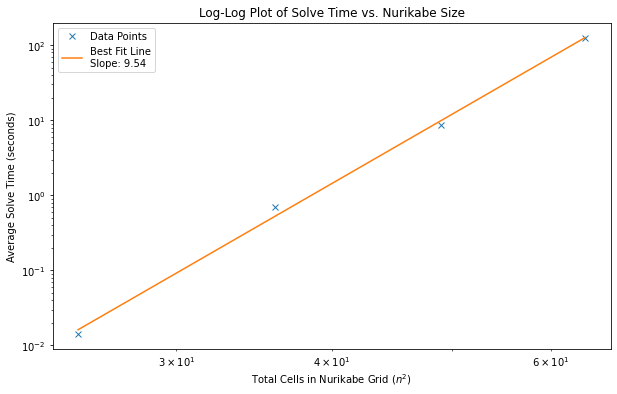

In [51]:
import matplotlib.pyplot as plt
import numpy as np

solve_times = np.array([overall_time_five, overall_time_six, overall_time_seven, overall_time_eight]) 
puzzle_sizes = np.array([5**2, 6**2, 7**2, 8**2]) 




plt.figure(figsize=(10, 6))
plt.loglog(puzzle_sizes, solve_times, 'x', label='Data Points')

# Fit a line to the log-log plot
log_puzzle_sizes = np.log(puzzle_sizes)
log_solve_times = np.log(solve_times)
slope, intercept = np.polyfit(log_puzzle_sizes, log_solve_times, 1)
line_of_best_fit = np.exp(intercept + slope*log_puzzle_sizes)

# Plot the line of best fit
plt.loglog(puzzle_sizes, line_of_best_fit, label=f'Best Fit Line\nSlope: {slope:.2f}')

# Add labels, title, and legend
plt.xlabel('Total Cells in Nurikabe Grid ($n^2$)')
plt.ylabel('Average Solve Time (seconds)')
plt.title('Log-Log Plot of Solve Time vs. Nurikabe Size')
plt.legend()

# Display the plot
plt.show()


In [149]:
print(solve_times)

[1.42130194e-02 2.71062921e-02 8.62093667e+00 1.25955539e+02]


In [23]:
#9x9 
nine_by_nine = [3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,4,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0]
print(len(nine_by_nine))

81


In [52]:
from time import perf_counter
solve(nine_by_nine,9)

510.80497391999995


[[3, 3, 3, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 4, 4, 4, 0, 0],
 [2, 0, 1, 0, 0, 4, 0, 1, 0],
 [2, 0, 0, 5, 5, 0, 0, 0, 0],
 [0, 5, 5, 5, 0, 0, 3, 3, 3],
 [0, 0, 0, 0, 4, 0, 0, 0, 0],
 [0, 3, 3, 0, 4, 4, 0, 1, 0],
 [1, 0, 3, 0, 4, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 1, 0, 2]]

In [54]:
nine_2 = [7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,3,0,0,0,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,2]
print(len(nine_2))

81


In [55]:
solve(nine_2,9)

1601.8125885219997


[[7, 7, 7, 7, 7, 7, 7, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 4],
 [5, 5, 0, 1, 0, 3, 3, 0, 4],
 [5, 0, 2, 0, 0, 3, 0, 0, 4],
 [5, 0, 2, 0, 2, 0, 1, 0, 0],
 [5, 0, 0, 0, 2, 0, 0, 5, 5],
 [0, 2, 2, 0, 0, 0, 5, 5, 5],
 [0, 0, 0, 0, 3, 0, 0, 0, 0],
 [3, 3, 3, 0, 3, 3, 0, 2, 2]]